# Leseon 01

1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

а) нет

б) нет

в) нет

г) да

д) да, если движение автобуса по расписанию

е) да

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df_duq = pd.read_csv('data/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
df_duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
df_duq.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
df_duq.isnull().sum()

DUQ_MW    0
dtype: int64

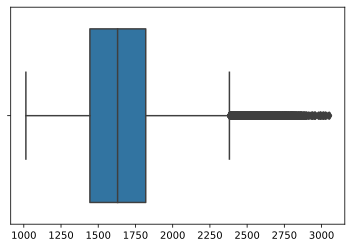

In [7]:
sns.boxplot(df_duq.values);

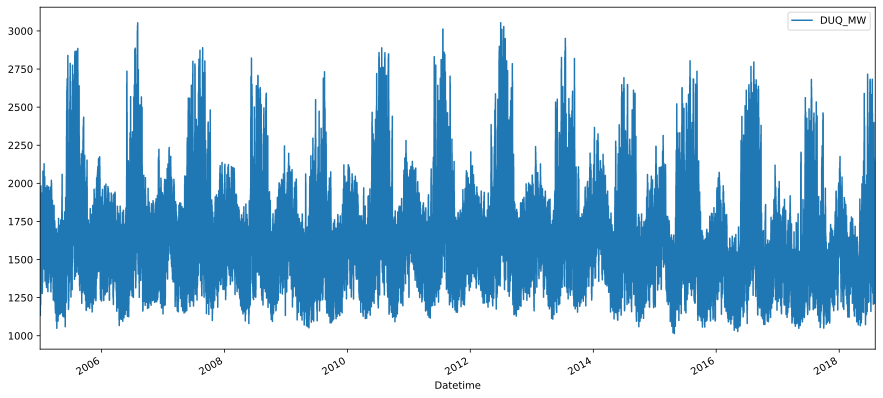

In [8]:
df_duq.plot(figsize = (15, 7));

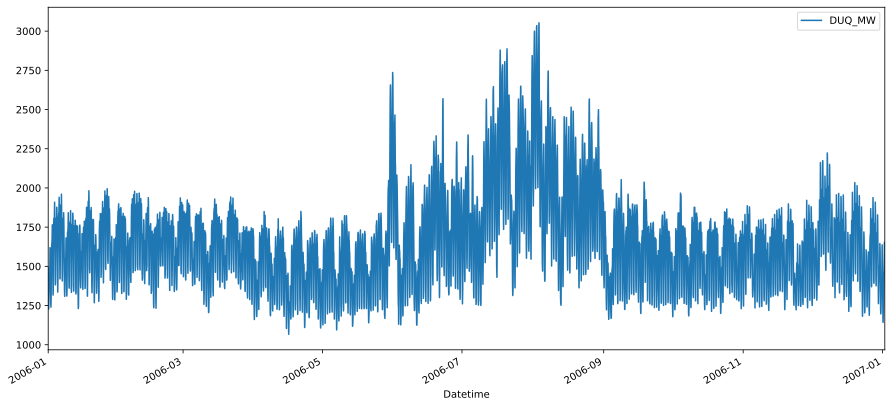

In [9]:
df_duq['2006-01-01':'2007-01-01'].plot(figsize=(15,7));

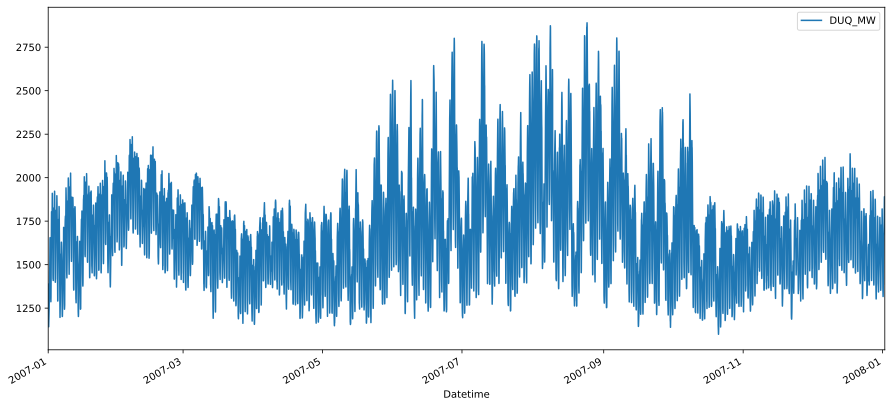

In [10]:
df_duq['2007-01-01':'2008-01-01'].plot(figsize=(15,7));

- В данных отсутствуют пропуски.
- Данные имеют "сезонные" колебания.
- В данных нет явных выбросов. аномальных значений.

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [11]:
df_brent = pd.read_excel('data/нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [12]:
df_brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [13]:
df_brent.sort_index(inplace=True)

In [14]:
df_brent

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
...,...
2019-08-27,59.59
2019-08-28,59.84
2019-08-29,60.37


In [15]:
df_brent.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


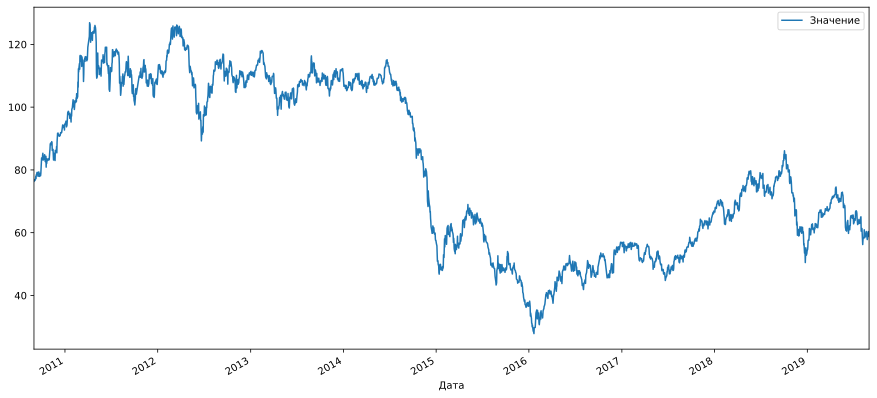

In [16]:
df_brent.plot(figsize=(15,7));

In [17]:
df_brent_week = df_brent.resample('W').mean()
df_brent_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [18]:
df_brent_mounth = df_brent.resample('M').mean()
df_brent_mounth.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

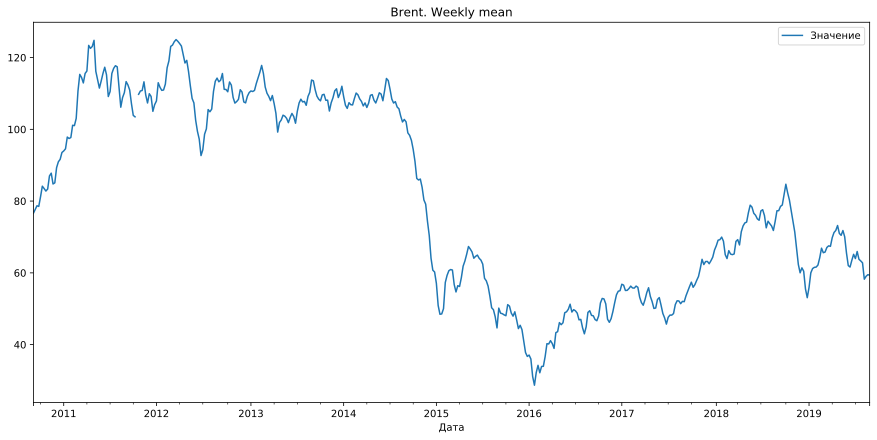

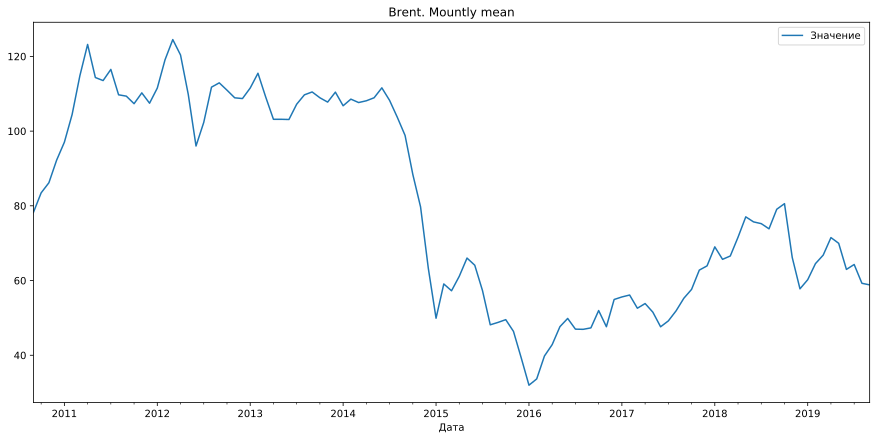

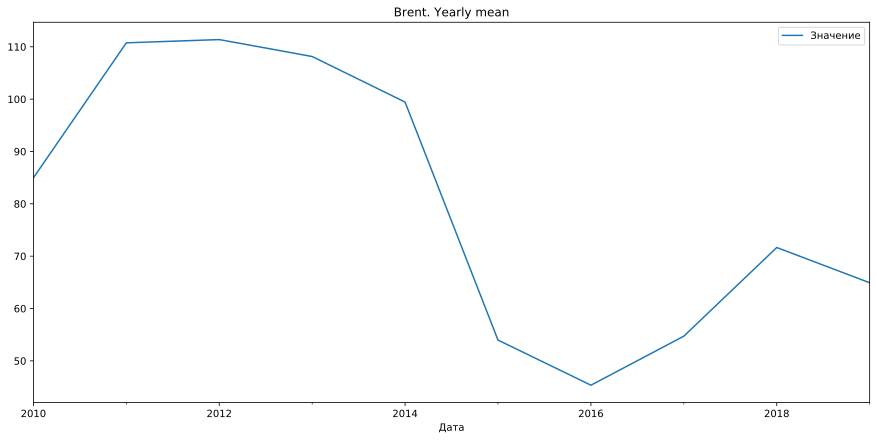

In [19]:
df_brent.resample('W').mean().plot(figsize=(15,7), title='Brent. Weekly mean')
df_brent.resample('M').mean().plot(figsize=(15,7), title='Brent. Mountly mean')
df_brent.resample('A').mean().plot(figsize=(15,7), title='Brent. Yearly mean');

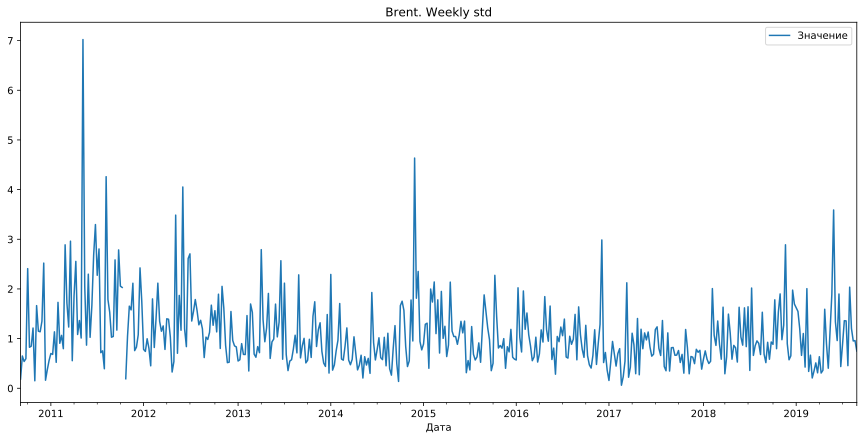

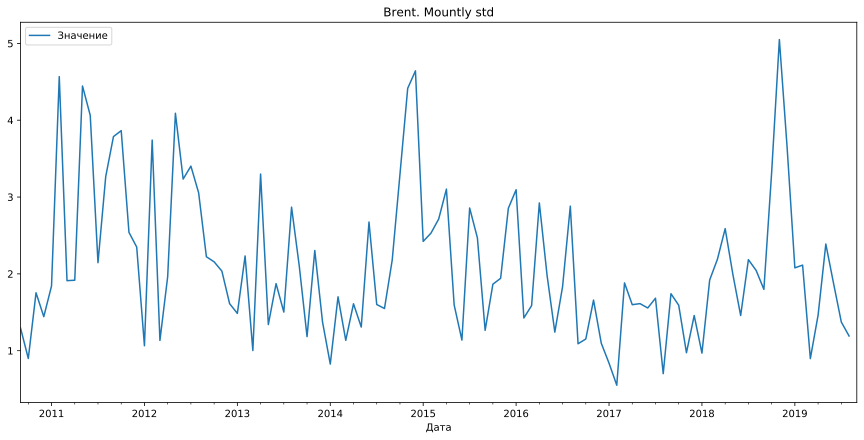

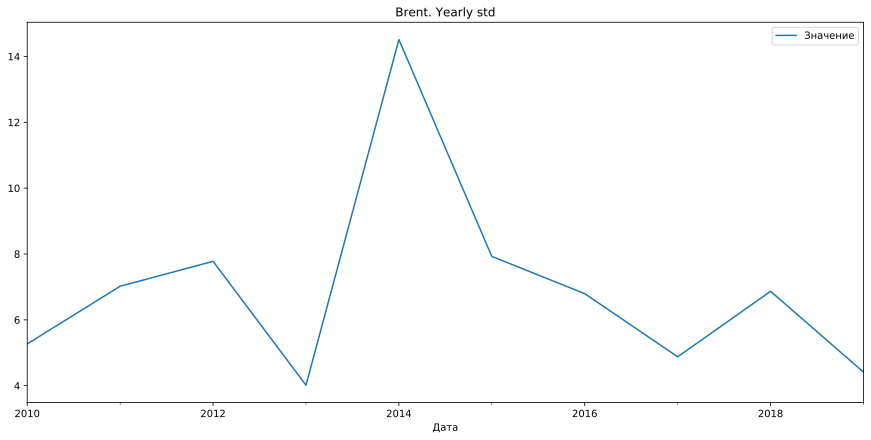

In [20]:
df_brent.resample('W').std().plot(figsize=(15,7), title='Brent. Weekly std')
df_brent.resample('M').std().plot(figsize=(15,7), title='Brent. Mountly std')
df_brent.resample('A').std().plot(figsize=(15,7), title='Brent. Yearly std');

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Сглаживаются колебания кривой. Чем больше интервал — тем более сглаженной окажется кривая.